## 35단계: 고차 미분 계산 그래프프

> 이전 단계에 이어 이번 단계에서는 tanh(쌍곡탄젠트, 하이퍼볼릭 탄젠트) 함수를 추가합니다. 수식은 `식 35.1`과 같으며, 모양은 `그림 35-1`과 같습니다.

<img src="images/식 35.1.png" width=400/>

</br>

<img src="images/그림 35-1.png" width=500/>

### 35.1 tanh 함수 미분

합성함수 미분(`식 35.2`)와 지수함수 미분($\frac{\partial e^x}{\partial x} = e^x$)을 이용하면 `식 35.3`을 도출할 수 있다.

<img src="images/식 35.3.png" width=600/>

### 35.2 tanh 함수 구현

In [ ]:
# dezero/functions.py

class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
        return y
    
    def backward(self, gy):
        y = self.outputs[0]
        gx = gy * (1 - y * y)  # 1 - y ** 2 도 가능
        return gx
    
def tanh(x):
    return Tanh()(x)

### 35.3 고차 미분 계산 그래프 시각화

먼저 tanh 함수의 1차 미분 그래프를 확인해보자

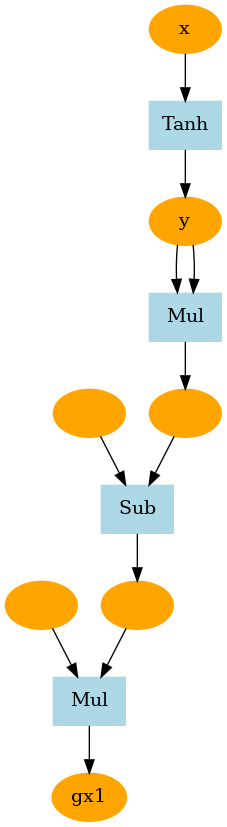

In [2]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 0

for i in range(iters):
    gx = x.grad
    x.clear_grad()
    gx.backward(create_graph=True)

# 계산 그래프 그리기
gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose=False)

마찬가지로 이후 고차 미분을 계산해보면 다음과 같다.

<img src="images/그림 35-3.png" width=700/>

</br>

<img src="images/그림 35-4.png" width=700/>

</br>

<img src="images/그림 35-5.png" width=700/>